In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
df = pd.read_csv('./0404/dataset.csv')
df.dropna(inplace=True)
df['usage_power'] = df['usage_power'].replace(',', '', regex=True)
df['usage_power'] = df['usage_power'].astype('float64')
df

,date,usage_power,product_1,product_2,product_total,temp,humid
0,2017-01-01,6095.70,0.0,0.00,0.00,1.1,73.000000
1,2017-01-02,9962.15,19399.4,1411.00,20810.40,2.5,67.000000
2,2017-01-03,11196.00,20456.6,1802.00,22258.60,4.1,56.000000
3,2017-01-04,12146.23,20003.6,2092.00,22095.60,4.3,67.583333
4,2017-01-05,12156.81,20256.1,2026.00,22282.10,2.3,71.541667
...,...,...,...,...,...,...,...
1643,2021-07-30,16418.70,0.0,0.00,0.00,26.7,80.958333
1644,2021-07-31,8942.10,0.0,0.00,0.00,26.8,79.583333
1645,2021-08-01,6092.81,0.0,0.00,0.00,25.8,90.500000
1646,2021-08-02,13881.39,16043.4,3973.20,20016.60,25.5,89.333333


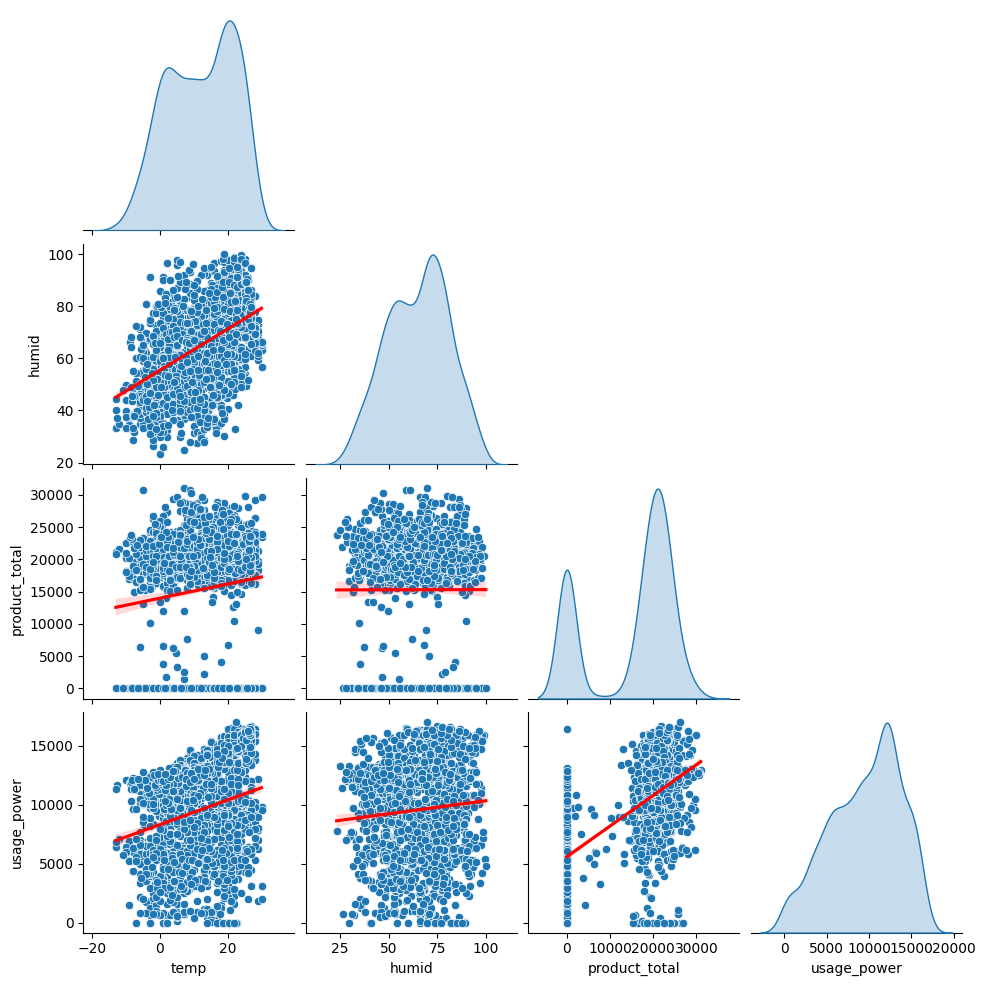

In [7]:
# sns.pairplot(df[ ['temp', 'humid', 'product_total', 'usage_power'] ], diag_kind="kde")

key_col = ['temp', 'humid', 'product_total', 'usage_power']
pp = sns.pairplot(df[key_col], diag_kind="kde", corner=True)
pp.map_lower(sns.regplot, color='red', scatter=False)
# pp.map_diag(sns.scatterplot)

In [10]:
df[ key_col ].corr()

,temp,humid,product_total,usage_power
temp,1.000000,0.493637,0.110828,0.250991
humid,0.493637,1.000000,0.000961,0.085757
product_total,0.110828,0.000961,1.000000,0.616558
usage_power,0.250991,0.085757,0.616558,1.000000


In [11]:
# X: feature, y: label

# X = df[ ['temp', 'humid', 'product_1', 'product_2', 'product_total'] ]
X = df[ ['temp', 'humid', 'product_total'] ]
# y = df[ ['Usage_power_1', 'Usage_power_2', 'Usage_power_total', 'Usage_LNG_1', 'Usage_LNG_2', 'Usage_LNG_total'] ]
y = df[ ['usage_power'] ]

In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

# Linear Regression #

In [13]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [14]:
pred = model.predict(X_test)

In [15]:
from sklearn.metrics import mean_squared_error

y_pred = model.predict(X_test)
mean_squared_error(y_pred, y_test, squared = False)

3135.5904714024637

# SVM

In [16]:
from sklearn.svm import LinearSVR

svm_reg = LinearSVR(epsilon=1.5)
svm_reg.fit(X_train, y_train)

/opt/python/3.10.4/lib/python3.10/site-packages/sklearn/utils/validation.py:1107: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/python/3.10.4/lib/python3.10/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVR(epsilon=1.5)

In [17]:
from sklearn.svm import SVR

svm_poly_reg = SVR(kernel="poly", degree=2, C=100, epsilon=0.1)
svm_poly_reg.fit(X_train, y_train)
y_pred = model.predict(X_test)

/opt/python/3.10.4/lib/python3.10/site-packages/sklearn/utils/validation.py:1107: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


ValueError: x and y must be the same size

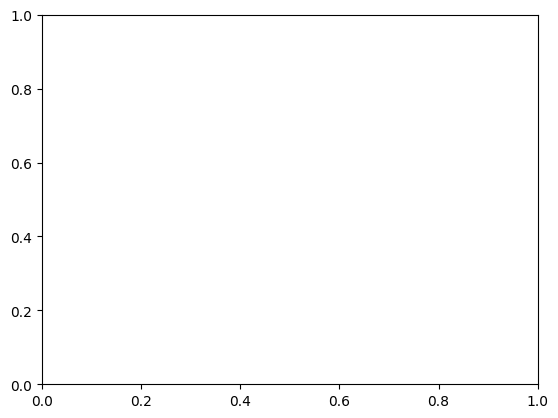

In [18]:
import matplotlib.pyplot as plt

plt.scatter(X_train, y_train, marker="+")
# plt.scatter(X_test, y_pred, marker="o")
plt.show()